# 1. import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers

2023-12-16 18:01:49.959034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 2. Read Data

In [7]:
df_5 = pd.read_csv("data/ZDT1_5var100gen/ZDT1_5var100gen.csv")
rank_5 = pd.read_csv("data/ZDT1_5var100gen/rank_info.csv",header=None)
df_5["RANK"] = rank_5
df_ml_5 = df_5.copy()
df_ml_5 = df_ml_5.drop(columns=["Unnamed: 0"])
X_5 = df_ml_5.iloc[:, :5]
Y_5 = df_ml_5.loc[:, "RANK"]

In [8]:
df_10 = pd.read_csv("data/ZDT1_10var100gen/ZDT1_10var100gen.csv")
rank_10 = pd.read_csv("data/ZDT1_10var100gen/rank_info.csv",header=None)
df_10["RANK"] = rank_10
df_ml_10 = df_10.copy()
df_ml_10 = df_ml_10.drop(columns=["Unnamed: 0"])
X_10 = df_ml_10.iloc[:, :10]
Y_10 = df_ml_10.loc[:, "RANK"]

In [9]:
df_15 = pd.read_csv("data/ZDT1_15var100gen/ZDT1_15var100gen.csv")
rank_15 = pd.read_csv("data/ZDT1_15var100gen/rank_info.csv",header=None)
df_15["RANK"] = rank_15
df_ml_15 = df_15.copy()
df_ml_15 = df_ml_15.drop(columns=["Unnamed: 0"])
X_15 = df_ml_15.iloc[:, :15]
Y_15 = df_ml_15.loc[:, "RANK"]

# 3. PCA  

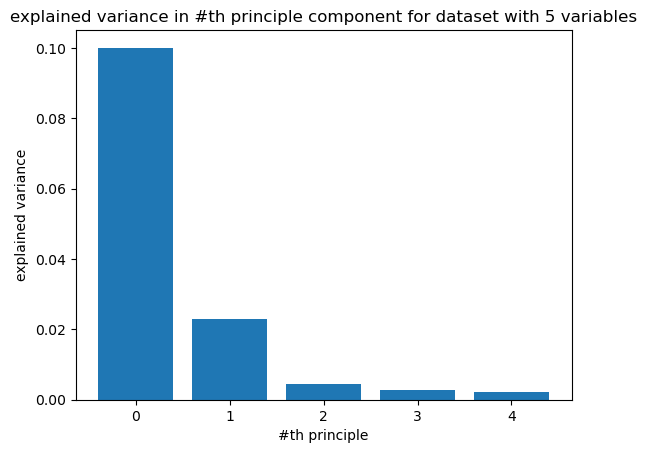

In [10]:
pca = PCA(n_components=5)
pca.fit(X_5)
explained_variance = pca.explained_variance_
plt.bar(range(5), explained_variance)
plt.xlabel('#th principle')
plt.ylabel('explained variance')
plt.title("explained variance in #th principle component for dataset with 5 variables")
plt.show()

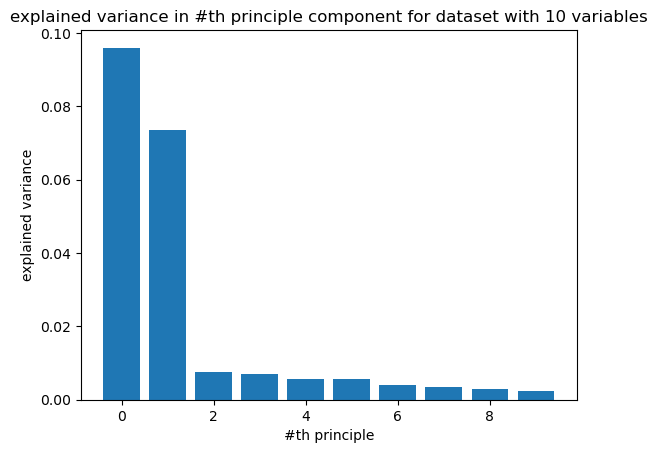

In [11]:
pca = PCA(n_components=10)
pca.fit(X_10)
explained_variance = pca.explained_variance_
plt.bar(range(10), explained_variance)
plt.xlabel('#th principle')
plt.ylabel('explained variance')
plt.title("explained variance in #th principle component for dataset with 10 variables")
plt.show()

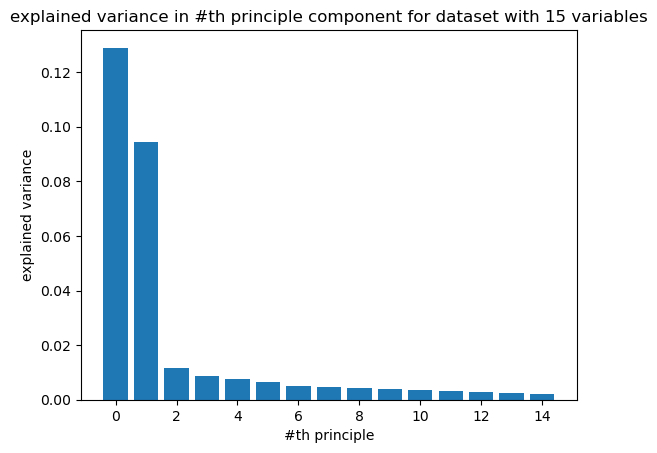

In [13]:
pca = PCA(n_components=15)
pca.fit(X_15)
explained_variance = pca.explained_variance_
plt.bar(range(15), explained_variance)
plt.xlabel('#th principle')
plt.ylabel('explained variance')
plt.title("explained variance in #th principle component for dataset with 15 variables")
plt.show()

In all three dataset, the first two principle components can explain most of the variance. Therefore, the first two principle components are chosen in these three datasets.

In [14]:
pca_5 = PCA(n_components=2)
X_pca_5 = pca_5.fit_transform(X_5)
df_5_pca = pd.DataFrame({"com1": X_pca_5[:, 0], "com2": X_pca_5[:, 1], "rank": Y_5})

In [15]:
pca_10 = PCA(n_components=2)
X_pca_10 = pca_10.fit_transform(X_10)
df_10_pca = pd.DataFrame({"com1": X_pca_10[:, 0], "com2": X_pca_10[:, 1], "rank": Y_10})

In [16]:
pca_15 = PCA(n_components=2)
X_pca_15 = pca_15.fit_transform(X_15)
df_15_pca = pd.DataFrame({"com1": X_pca_15[:, 0], "com2": X_pca_15[:, 1], "rank": Y_15})

# 4. Train models using the data with and without PCA

## 4.1. Logsitic Regression

In [26]:
# 5 variables
# using data after PCA processed
lr_acc_pca_5 = []
lr_f1_pca_5 = []
for i in range(11):
    Y = df_5_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_5_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    lr_acc_pca_5.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    lr_f1_pca_5.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
lr_acc_5 = []
lr_f1_5 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_5]
    X_train, X_test, y_train, y_test = train_test_split(X_5, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    lr_acc_5.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    lr_f1_5.append(f1_score(y_pred=test_predict, y_true=y_test))


In [24]:
# 10 variables
# using data after PCA processed
lr_acc_pca_10 = []
lr_f1_pca_10 = []
for i in range(11):
    Y = df_10_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_10_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    lr_acc_pca_10.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    lr_f1_pca_10.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
lr_acc_10 = []
lr_f1_10 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_10]
    X_train, X_test, y_train, y_test = train_test_split(X_10, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    lr_acc_10.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    lr_f1_10.append(f1_score(y_pred=test_predict, y_true=y_test))

In [25]:
# 15 variables
# using data after PCA processed
lr_acc_pca_15 = []
lr_f1_pca_15 = []
for i in range(11):
    Y = df_15_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_15_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    lr_acc_pca_15.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    lr_f1_pca_15.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
lr_acc_15 = []
lr_f1_15 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_15]
    X_train, X_test, y_train, y_test = train_test_split(X_15, Y, test_size=0.33, random_state=888, stratify=Y)
    lr_cl = LogisticRegression(penalty="l2")
    lr_cl.fit(X_train, y_train)
    test_predict = lr_cl.predict(X_test)
    lr_acc_15.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    lr_f1_15.append(f1_score(y_pred=test_predict, y_true=y_test))

## 4.2. SVM

In [27]:
# 5 variables
# using data after PCA processed
svm_acc_pca_5 = []
svm_f1_pca_5 = []
for i in range(11):
    Y = df_5_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_5_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    svm_acc_pca_5.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    svm_f1_pca_5.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
svm_acc_5 = []
svm_f1_5 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_5]
    X_train, X_test, y_train, y_test = train_test_split(X_5, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    svm_acc_5.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    svm_f1_5.append(f1_score(y_pred=test_predict, y_true=y_test))

In [28]:
# 10 variables
# using data after PCA processed
svm_acc_pca_10 = []
svm_f1_pca_10 = []
for i in range(11):
    Y = df_10_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_10_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    svm_acc_pca_10.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    svm_f1_pca_10.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
svm_acc_10 = []
svm_f1_10 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_10]
    X_train, X_test, y_train, y_test = train_test_split(X_10, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    svm_acc_10.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    svm_f1_10.append(f1_score(y_pred=test_predict, y_true=y_test))

In [29]:
# 15 variables
# using data after PCA processed
svm_acc_pca_15 = []
svm_f1_pca_15 = []
for i in range(11):
    Y = df_15_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_15_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    svm_acc_pca_15.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    svm_f1_pca_15.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
svm_acc_15 = []
svm_f1_15 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_15]
    X_train, X_test, y_train, y_test = train_test_split(X_15, Y, test_size=0.33, random_state=888, stratify=Y)
    svm_cl = svm.SVC(kernel="linear")
    svm_cl.fit(X_train, y_train)
    test_predict = svm_cl.predict(X_test)
    svm_acc_15.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    svm_f1_15.append(f1_score(y_pred=test_predict, y_true=y_test))

## 4.3. Decision Tree

In [31]:
# 5 variables
# using data after PCA processed
dt_acc_pca_5 = []
dt_f1_pca_5 = []
for i in range(11):
    Y = df_5_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_5_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=3)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    dt_acc_pca_5.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    dt_f1_pca_5.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
dt_acc_5 = []
dt_f1_5 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_5]
    X_train, X_test, y_train, y_test = train_test_split(X_5, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=5)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    dt_acc_5.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    dt_f1_5.append(f1_score(y_pred=test_predict, y_true=y_test))

In [32]:
# 10 variables
# using data after PCA processed
dt_acc_pca_10 = []
dt_f1_pca_10 = []
for i in range(11):
    Y = df_10_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_10_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=3)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    dt_acc_pca_10.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    dt_f1_pca_10.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
dt_acc_10 = []
dt_f1_10 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_10]
    X_train, X_test, y_train, y_test = train_test_split(X_10, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=10)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    dt_acc_10.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    dt_f1_10.append(f1_score(y_pred=test_predict, y_true=y_test))

In [33]:
# 15 variables
# using data after PCA processed
dt_acc_pca_15 = []
dt_f1_pca_15 = []
for i in range(11):
    Y = df_15_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_15_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=3)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    dt_acc_pca_15.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    dt_f1_pca_15.append(f1_score(y_pred=test_predict, y_true=y_test))

# using data without PCA processing
dt_acc_15 = []
dt_f1_15 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_15]
    X_train, X_test, y_train, y_test = train_test_split(X_15, Y, test_size=0.33, random_state=888, stratify=Y)
    dt_cl = DecisionTreeClassifier(random_state=0, max_depth=15)
    dt_cl.fit(X_train, y_train)
    test_predict = dt_cl.predict(X_test)
    dt_acc_15.append(accuracy_score(y_pred=test_predict, y_true=y_test))
    dt_f1_15.append(f1_score(y_pred=test_predict, y_true=y_test))

## 4.4. Feedforward Neural Network

In [42]:
def FNN_5():
    fnnmodel = keras.Sequential([
        layers.Input(shape=(5,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    return fnnmodel

In [36]:
def FNN_10():
    fnnmodel = keras.Sequential([
        layers.Input(shape=(10,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    return fnnmodel

In [37]:
def FNN_15():
    fnnmodel = keras.Sequential([
        layers.Input(shape=(15,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    return fnnmodel

In [38]:
def FNN_pca():
    fnnmodel = keras.Sequential([
        layers.Input(shape=(2,)),
        layers.Dense(24, activation='relu'),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    return fnnmodel

In [43]:
fnnpca_cl = FNN_pca()
fnnpca_cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fnn5 = FNN_5()
fnn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fnn10 = FNN_10()
fnn10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fnn15 = FNN_15()
fnn15.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# 5 variables
# using data after PCA processed
fnn_acc_pca_5 = []
fnn_f1_pca_5 = []
for i in range(11):
    Y = df_5_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_5_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    fnnpca_cl.fit(X_train, y_train)
    test_predict = fnnpca_cl.predict(X_test)
    fnn_acc_pca_5.append(accuracy_score(y_pred=(test_predict > 0.5), y_true=y_test))
    fnn_f1_pca_5.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

# using data without PCA processing
fnn_acc_5 = []
fnn_f1_5 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_5]
    X_train, X_test, y_train, y_test = train_test_split(X_5, Y, test_size=0.33, random_state=888, stratify=Y)
    fnn5.fit(np.array(X_train), np.array(y_train))
    test_predict = fnn5.predict(X_test)
    fnn_acc_5.append(accuracy_score(y_pred=(test_predict > 0.5), y_true=y_test))
    fnn_f1_5.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

52/52 [==============================] - 0s 1ms/step


In [52]:
# 10 variables
# using data after PCA processed
fnn_acc_pca_10 = []
fnn_f1_pca_10 = []
for i in range(11):
    Y = df_10_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_10_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    fnnpca_cl.fit(X_train, y_train)
    test_predict = fnnpca_cl.predict(X_test)
    fnn_acc_pca_10.append(accuracy_score(y_pred=(test_predict > 0.5), y_true=y_test))
    fnn_f1_pca_10.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

# using data without PCA processing
fnn_acc_10 = []
fnn_f1_10 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_10]
    X_train, X_test, y_train, y_test = train_test_split(X_10, Y, test_size=0.33, random_state=888, stratify=Y)
    fnn10.fit(np.array(X_train), np.array(y_train))
    test_predict = fnn10.predict(X_test)
    fnn_acc_10.append(accuracy_score(y_pred=(test_predict > 0.5), y_true=y_test))
    fnn_f1_10.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

52/52 [==============================] - 0s 2ms/step


In [53]:
# 15 variables
# using data after PCA processed
fnn_acc_pca_15 = []
fnn_f1_pca_15 = []
for i in range(11):
    Y = df_15_pca["rank"].apply(lambda x: 1 if x <= i else 0)
    X = df_15_pca.iloc[:, :2]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=888, stratify=Y)
    fnnpca_cl.fit(X_train, y_train)
    test_predict = fnnpca_cl.predict(X_test)
    fnn_acc_pca_15.append(accuracy_score(y_pred=(test_predict > 0.5), y_true=y_test))
    fnn_f1_pca_15.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

# using data without PCA processing
fnn_acc_15 = []
fnn_f1_15 = []
for i in range(11):
    Y = [1 if y <= i else 0 for y in Y_15]
    X_train, X_test, y_train, y_test = train_test_split(X_15, Y, test_size=0.33, random_state=888, stratify=Y)
    fnn15.fit(np.array(X_train), np.array(y_train))
    test_predict = fnn15.predict(X_test)
    fnn_acc_15.append(accuracy_score(y_pred=(test_predict > 0.5), y_true=y_test))
    fnn_f1_15.append(f1_score(y_pred=(test_predict > 0.5), y_true=y_test))

52/52 [==============================] - 0s 1ms/step


# 5. Compare the models' performances with and without PCA

calculate the difference between the accuracy of with and withou pca

In [78]:
delta_lr_15 = np.abs(np.array(lr_f1_15) - np.array(lr_f1_pca_15))
delta_lr_10 = np.abs(np.array(lr_f1_10) - np.array(lr_f1_pca_10))
delta_lr_5 = np.abs(np.array(lr_f1_5) - np.array(lr_f1_pca_5))

In [79]:
delta_dt_15 = np.abs(np.array(dt_f1_15) - np.array(dt_f1_pca_15))
delta_dt_10 = np.abs(np.array(dt_f1_10) - np.array(dt_f1_pca_10))
delta_dt_5 = np.abs(np.array(dt_f1_5) - np.array(dt_f1_pca_5))

In [80]:
delta_svm_15 = np.abs(np.array(svm_f1_15) - np.array(svm_f1_pca_15))
delta_svm_10 = np.abs(np.array(svm_f1_10) - np.array(svm_f1_pca_10))
delta_svm_5 = np.abs(np.array(svm_f1_5) - np.array(svm_f1_pca_5))

In [81]:
delta_fnn_15 = np.abs(np.array(fnn_f1_15) - np.array(fnn_f1_pca_15))
delta_fnn_10 = np.abs(np.array(fnn_f1_10) - np.array(fnn_f1_pca_10))
delta_fnn_5 = np.abs(np.array(fnn_f1_5) - np.array(fnn_f1_pca_5))

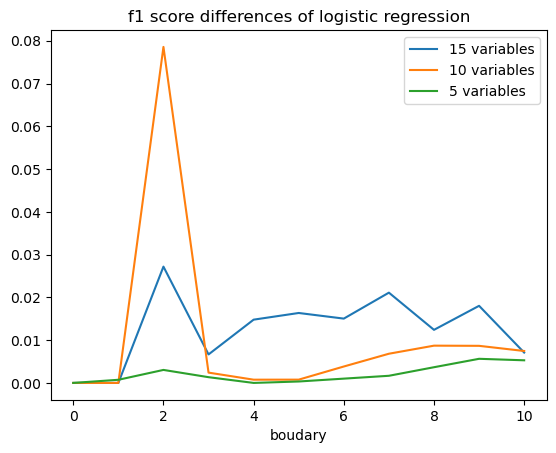

In [83]:
plt.plot(delta_lr_15, label="15 variables")
plt.plot(delta_lr_10, label="10 variables")
plt.plot(delta_lr_5, label="5 variables")
plt.xlabel("boudary")
plt.title("f1 score differences of logistic regression")
plt.legend()

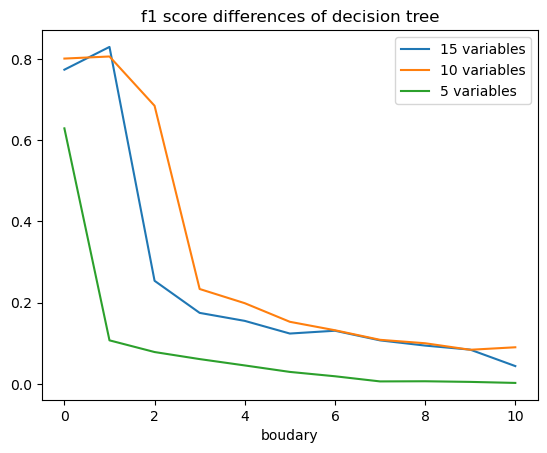

In [84]:
plt.plot(delta_dt_15, label="15 variables")
plt.plot(delta_dt_10, label="10 variables")
plt.plot(delta_dt_5, label="5 variables")
plt.xlabel("boudary")
plt.title("f1 score differences of decision tree")
plt.legend()

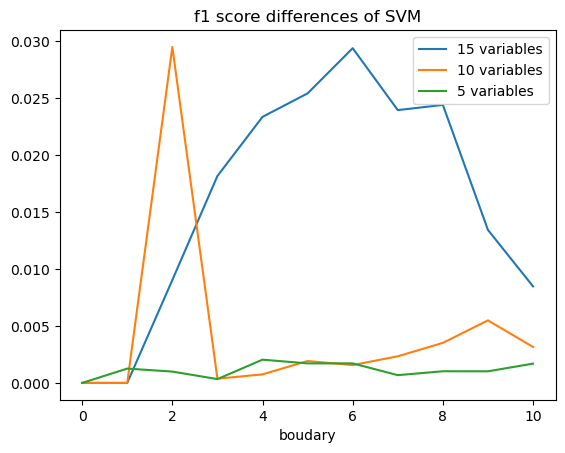

In [85]:
plt.plot(delta_svm_15, label="15 variables")
plt.plot(delta_svm_10, label="10 variables")
plt.plot(delta_svm_5, label="5 variables")
plt.xlabel("boudary")
plt.title("f1 score differences of SVM")
plt.legend()

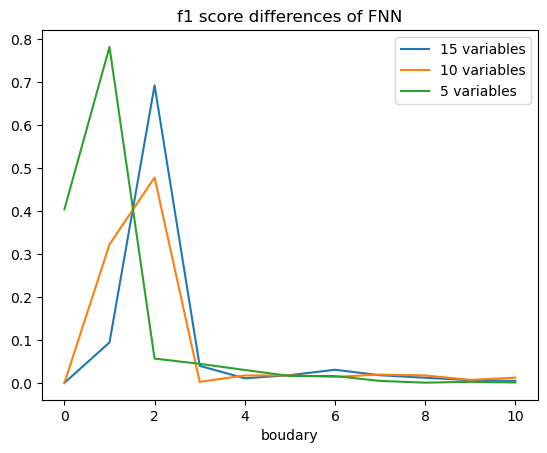

In [86]:
plt.plot(delta_fnn_15, label="15 variables")
plt.plot(delta_fnn_10, label="10 variables")
plt.plot(delta_fnn_5, label="5 variables")
plt.xlabel("boudary")
plt.title("f1 score differences of FNN")
plt.legend()

# 6. Compare different models' performances

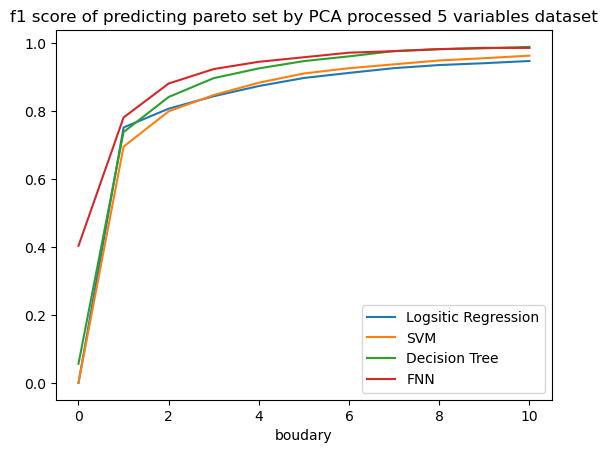

In [87]:
plt.plot(lr_f1_pca_5, label = "Logsitic Regression")
plt.plot(svm_f1_pca_5, label="SVM")
plt.plot(dt_f1_pca_5, label="Decision Tree")
plt.plot(fnn_f1_pca_5, label="FNN")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by PCA processed 5 variables dataset")
plt.legend()

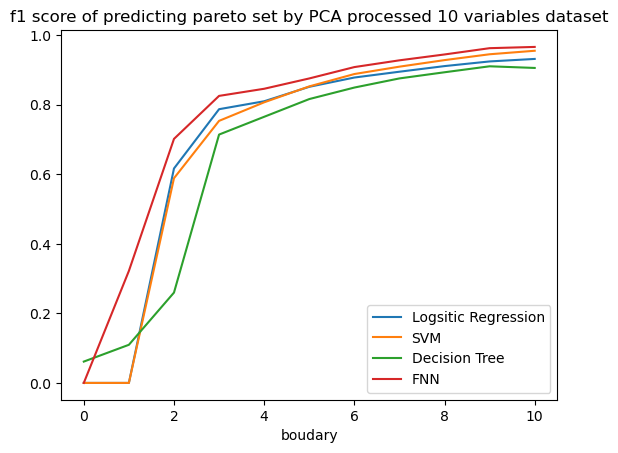

In [88]:
plt.plot(lr_f1_pca_10, label = "Logsitic Regression")
plt.plot(svm_f1_pca_10, label="SVM")
plt.plot(dt_f1_pca_10, label="Decision Tree")
plt.plot(fnn_f1_pca_10, label="FNN")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by PCA processed 10 variables dataset")
plt.legend()

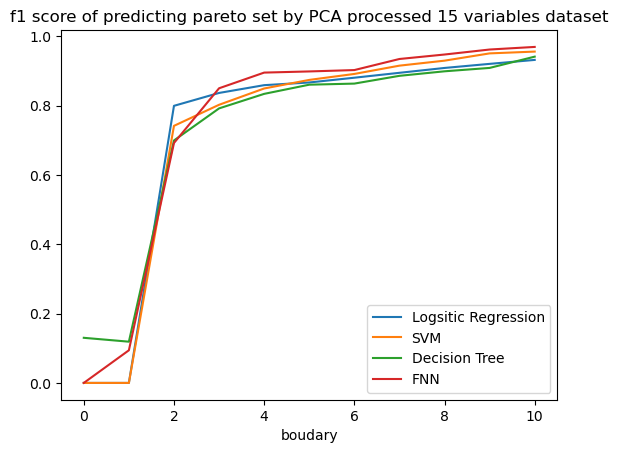

In [89]:
plt.plot(lr_f1_pca_15, label = "Logsitic Regression")
plt.plot(svm_f1_pca_15, label="SVM")
plt.plot(dt_f1_pca_15, label="Decision Tree")
plt.plot(fnn_f1_pca_15, label="FNN")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by PCA processed 15 variables dataset")
plt.legend()

# 7. Compare models' performances in different numbers of attributes

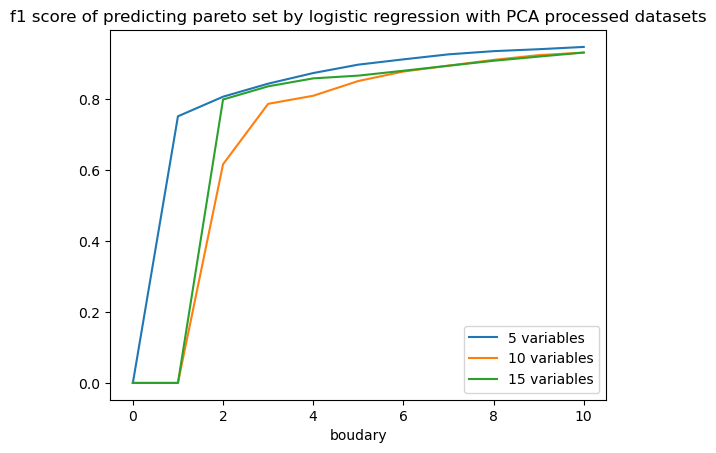

In [90]:
plt.plot(lr_f1_pca_5, label = "5 variables")
plt.plot(lr_f1_pca_10, label="10 variables")
plt.plot(lr_f1_pca_15, label="15 variables")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by logistic regression with PCA processed datasets")
plt.legend()

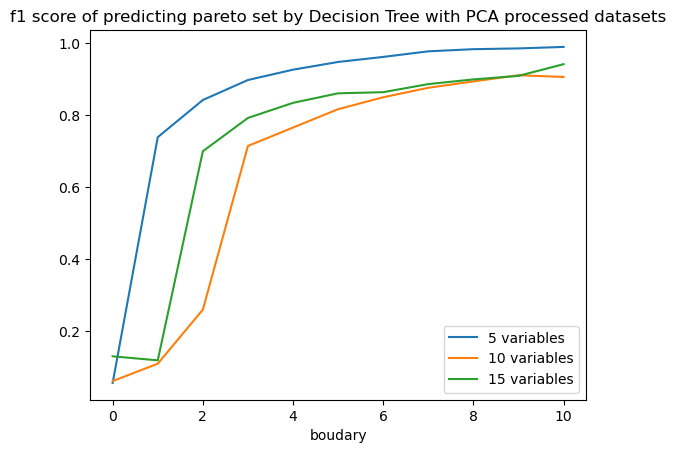

In [91]:
plt.plot(dt_f1_pca_5, label = "5 variables")
plt.plot(dt_f1_pca_10, label="10 variables")
plt.plot(dt_f1_pca_15, label="15 variables")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by Decision Tree with PCA processed datasets")
plt.legend()

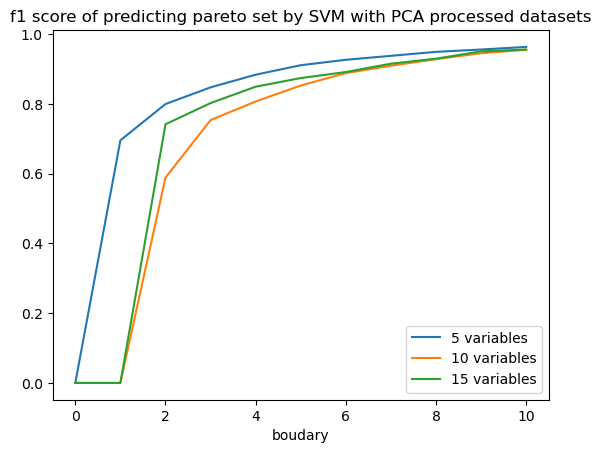

In [92]:
plt.plot(svm_f1_pca_5, label = "5 variables")
plt.plot(svm_f1_pca_10, label="10 variables")
plt.plot(svm_f1_pca_15, label="15 variables")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by SVM with PCA processed datasets")
plt.legend()

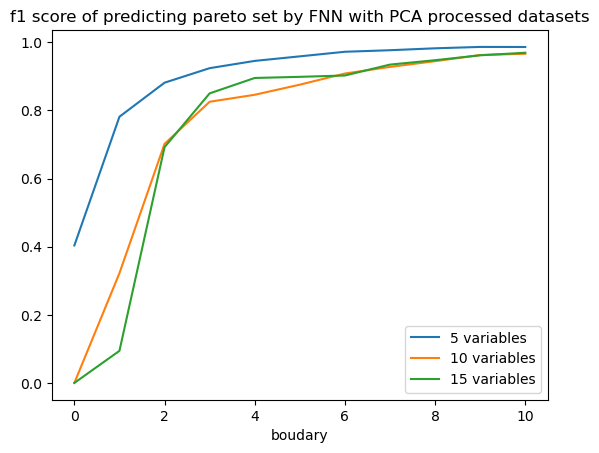

In [93]:
plt.plot(fnn_f1_pca_5, label = "5 variables")
plt.plot(fnn_f1_pca_10, label="10 variables")
plt.plot(fnn_f1_pca_15, label="15 variables")
plt.xlabel("boudary")
plt.title("f1 score of predicting pareto set by FNN with PCA processed datasets")
plt.legend()